In [155]:
import pandas as pd
data = pd.read_csv("VegasReviews.csv")
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,Score,5 star?
0,USA,11,4,13,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,9,January,Thursday,5,Yes
1,USA,119,21,75,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,3,January,Friday,3,No
2,USA,36,9,25,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,2,February,Saturday,5,Yes
3,UK,14,7,14,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,Europe,6,February,Friday,4,No
4,Canada,5,5,2,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,7,March,Tuesday,4,No


In [156]:
data['User country'],_ = pd.factorize(data['User country'])
data['Pool'],_ = pd.factorize(data['Pool'])
data['Gym'],_ = pd.factorize(data['Gym'])
data['Tennis court'],_ = pd.factorize(data['Tennis court'])
data['Spa'],_ = pd.factorize(data['Spa'])
data['Casino'],_ = pd.factorize(data['Casino'])
data['Hotel name'],_ = pd.factorize(data['Hotel name'])
data['Free internet'],_ = pd.factorize(data['Free internet'])
data['User continent'],_ = pd.factorize(data['User continent'])
data['Review month'],_ = pd.factorize(data['Review month'])
data['Review weekday'],_ = pd.factorize(data['Review weekday'])
data['5 star?'],_ = pd.factorize(data['5 star?'])
data['Traveler type'],_ = pd.factorize(data['Traveler type'])





In [142]:
features = data.columns.values.tolist()[0:-2]

In [1]:
X = data.iloc[:, :-2].values  
y = data.iloc[:, 19].values

NameError: name 'data' is not defined

In [158]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
clf=RandomForestClassifier(n_estimators=500)

In [180]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
y_pred=clf.predict(X_test)

In [181]:
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np
print(np.mean(y_pred != y_test))

0.3465346534653465


In [182]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[41 18]
 [17 25]]
             precision    recall  f1-score   support

         No       0.71      0.69      0.70        59
        Yes       0.58      0.60      0.59        42

avg / total       0.65      0.65      0.65       101



In [183]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

In [184]:
feature_imp

Hotel name           0.121969
Helpful votes        0.114806
Nr. reviews          0.111775
Nr. hotel reviews    0.096136
Review month         0.087506
Member years         0.080344
Review weekday       0.071982
Nr. rooms            0.069744
User country         0.063042
Hotel stars          0.055101
Traveler type        0.046982
User continent       0.036886
Tennis court         0.012874
Spa                  0.008773
Pool                 0.007437
Casino               0.005663
Free internet        0.005393
Gym                  0.003588
dtype: float64

In [154]:
data = data.drop(columns=['Free internet', 'Casino','Gym'])

No handles with labels found to put in legend.


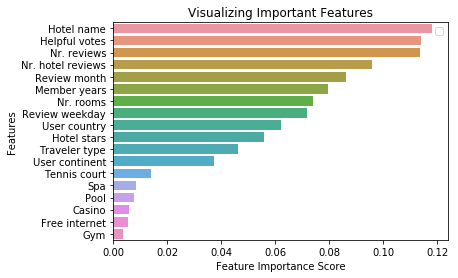

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()